LWI REGION 4 - CPPJ STRUCTURE PRIORITIZATION

WEST FORK (HUC08080205)

MODULES AND WORKING DIRECTORY

In [3]:
# imports all required modules
from pathlib import Path
import os
import geopandas as gpd

In [4]:
# sets working directory
pth=Path(r'X:\2020\2202134.00C_LWI Region 4 Modeling IDIQ\05C-II_WestForkCalcasieu-CTZ-CHF\DATA\Structures\CPPJ_Structure_Prioritization\Input_Shapefiles')
os.chdir(pth)

DEFINES JOIN ATTRIBUTES BY NEAREST FUNCTION

In [5]:
def joinAttrsByNearest(gdf_A,gdf_B,maxdist=1000):
    '''Join attrs from gdf_B to gdf_A one-to-one by "nearest" up to maxdist\n
    if no neighbors found within maxdist for a feature, the feature's attrs will be NaN\n
    datatypes can be whatever
    '''
    gdf_A['_idx_'] = range(len(gdf_A))
    
    B = gdf_B.copy()
    #B = B.to_crs(gdf_A.crs)
    B['geometry'] = B.buffer(maxdist)

    xx = gpd.overlay(gdf_A,B,keep_geom_type=False)
    if xx.type.iloc[0]=='Polygon':
        xx['weightt']=xx.area
    else:
        xx['weightt']=xx.length
    xx=xx.sort_values('weightt',ascending=False)
    xx

    xx=xx.groupby('_idx_').first().reset_index()
    # xx=xx.drop(['_idx_','weightt'],axis=1)
    xx
    assert len(xx)<=len(gdf_A)
    attrz = xx.columns[~xx.columns.isin(gdf_A.columns)].drop('weightt').to_list()
    attrz
    xx[attrz+['_idx_']]
    mergd = gdf_A.merge(xx[attrz+['_idx_']],on='_idx_',how='left')
    mergd
    mergd = mergd.drop('_idx_',axis=1)

    #clean up gdf A too as it added col to OG 
    gdf_A = gdf_A.drop('_idx_',axis=1)
    del B
    return mergd

ESTABLISHES ALL REQUIRED INPUT FILES

In [6]:
# contains all structures that will be analyzed
inputStructures='CPPJ_All_Structures.shp'

# used to clip structures to watershed boundary
inputBoundary='WF_Boundary2D.shp'

# will be used for roadway classification crierion
inputRoadwayClassificationsOSM='RoadwayClassifications_OSM.shp'
inputRoadwayClassificationsMTP='RoadwayClassifications_MTP.shp'

# used for stream order criterion
inputStreamOrder='WF_Channels_StreamOrder.shp'

# used for detail of survey criterion
inputDetailOfSurvey='WF_Channels_ApprovedWorkPlan.shp'

LOADS STRUCTURES DATA

<AxesSubplot: >

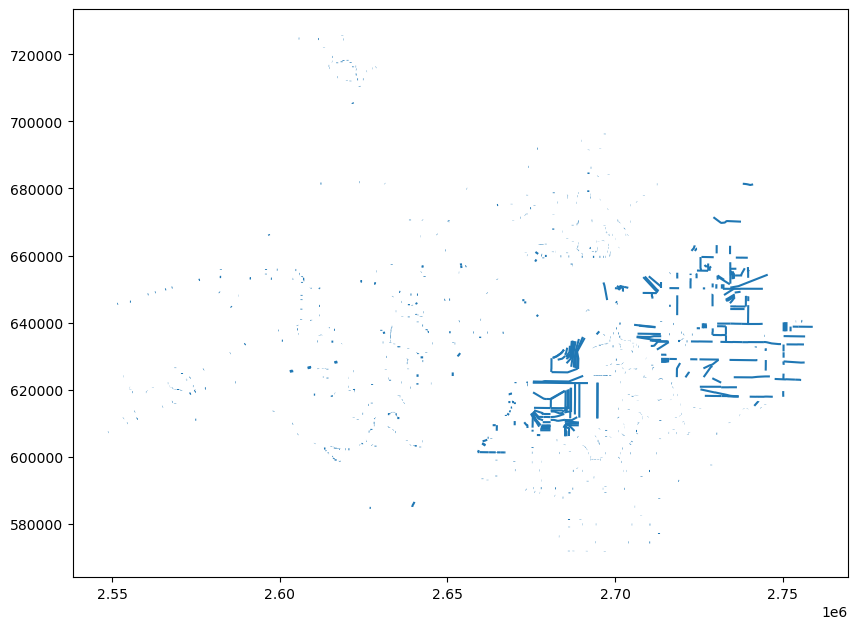

In [7]:
# reads structures shapefile
structures=gpd.read_file(inputStructures)

# reanmes overtop and head differnetial fields
structures=structures.rename(columns={'_25yrOver':'25yrOver','_25yrDiff':'25yrDiff'})

# plots structures shapefile
structures.plot(figsize=(10,10))

CLIPS STRUCTURES TO WATERSHED BOUNDARY

<AxesSubplot: >

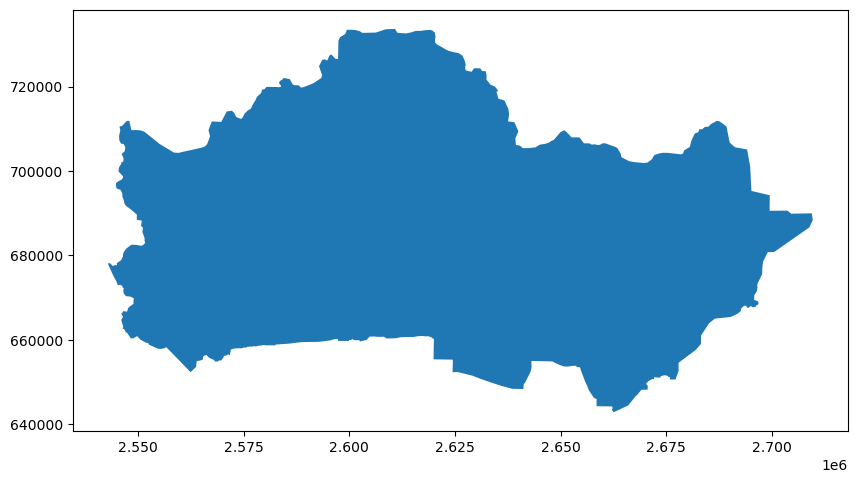

In [8]:
# reads boundary shapefile
boundary=gpd.read_file(inputBoundary)

# plots boundary shapefile
boundary.plot(figsize=(10,10))

In [9]:
# confirms crs match
assert structures.crs==boundary.crs

c:\Users\christianl\Anaconda3\envs\WF_Analysis\lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot: >

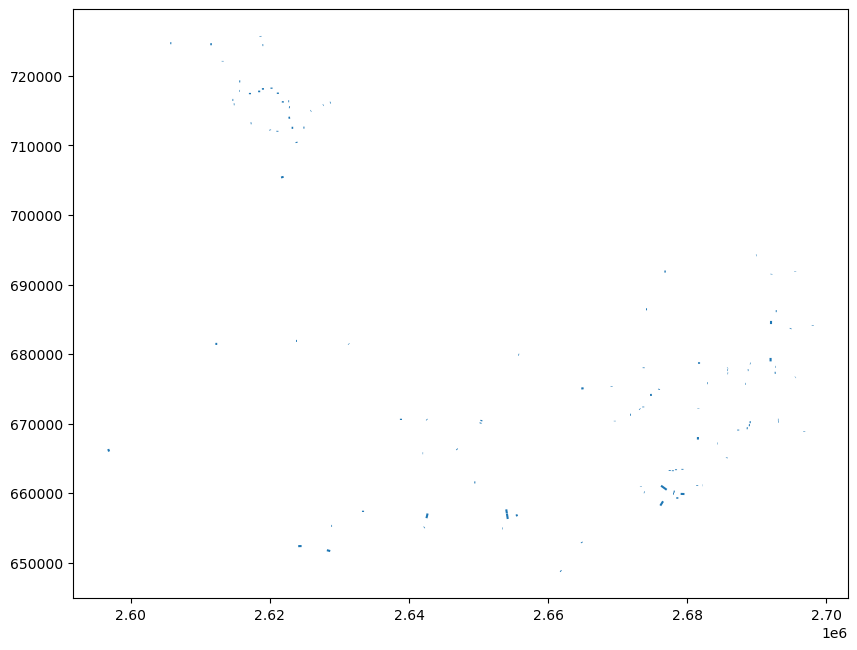

In [10]:
# clips all structures that intersect boundary
structures=gpd.sjoin(structures,boundary[['geometry']],op='intersects')

# removes auto-generated field
del structures['index_right']

# plots structures shapefile
structures.plot(figsize=(10,10))

In [11]:
structures

,Model,Type,Name,Top_Elev,US_WSE,DS_WSE,25yrOver,25yrDiff,geometry
72,CB_RAS_61_DwnStr.p05,Connection,STR-317: PRVT,25.830000,21.659079,18.747299,-4.170921,3.360292,"LINESTRING (2628181.603 651788.137, 2628357.58..."
74,CB_RAS_61_DwnStr.p05,Connection,STR-319: PRVT,25.469999,21.709848,16.967905,-3.760151,7.852481,"LINESTRING (2624058.885 652372.364, 2624223.90..."
266,HR_RAS_2022.p52,Connection,STR-134,86.900002,82.034157,80.452881,-4.865845,2.979767,"LINESTRING (2611637.999 724562.564, 2611412.92..."
267,HR_RAS_2022.p52,Connection,STR-137,78.980003,76.190659,75.169151,-2.789345,0.995476,"LINESTRING (2613194.159 722159.691, 2613193.37..."
268,HR_RAS_2022.p52,Connection,STR-139,72.220001,67.560547,65.766388,-4.659454,3.240299,"LINESTRING (2615720.017 719213.902, 2615576.50..."
...,...,...,...,...,...,...,...,...,...
900,ward_1.p04,Connection,STR-346 (Clvt),17.870001,14.415141,17.208517,-0.661484,3.389652,"LINESTRING (2678100.176 659924.122, 2677970.74..."
901,ward_1.p04,Connection,STR-347 (Clvt),17.190001,16.895008,16.310846,-0.294992,1.099752,"LINESTRING (2678214.014 660196.692, 2678054.30..."
907,ward_1.p04,Connection,STR-357 (Clvt),24.100000,23.723585,23.629932,-0.376415,0.678066,"LINESTRING (2692589.082 677296.746, 2692732.06..."
908,ward_1.p04,Connection,STR-358 (Bridge),23.500000,23.870897,23.856319,0.370897,0.411385,"LINESTRING (2695550.004 676645.730, 2695590.74..."


CREATES FIELD FOR ROADWAY CLASSIFICATION CRITERION

<AxesSubplot: >

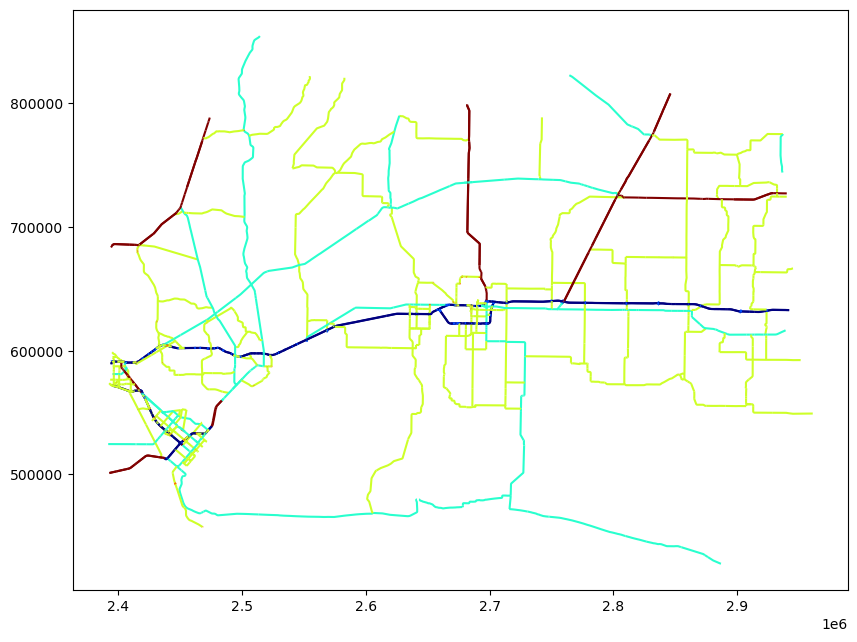

In [12]:
# reads osm shapefile
roadsOSM=gpd.read_file(inputRoadwayClassificationsOSM)

# plots osm shapefile
roadsOSM.plot(figsize=(10,10),cmap='jet',column='highway')

<AxesSubplot: >

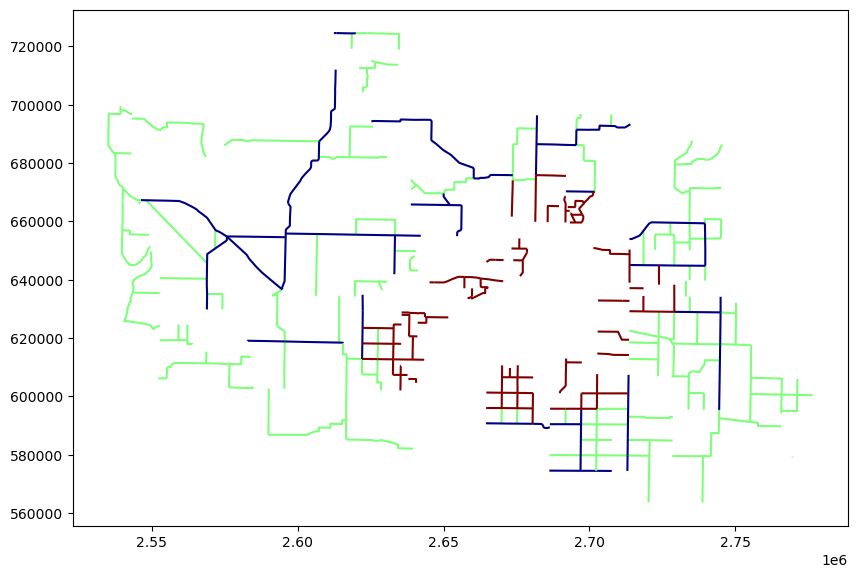

In [13]:
# reads mtp shapefile
roadsMTP=gpd.read_file(inputRoadwayClassificationsMTP)

# plots mtp shapefile
roadsMTP.plot(figsize=(10,10),cmap='jet',column='type')

In [14]:
# confirms crs match
assert structures.crs==roadsOSM.crs and structures.crs==roadsMTP.crs

In [15]:
# applies join attribute by nearest function
structures=joinAttrsByNearest(structures,roadsOSM[['highway','geometry']],50)

# renames associated field
structures=structures.rename(columns={'highway':'RoadClass'})

In [16]:
# creates copy of structures dataframe
structuresMTP=structures.copy(deep=True)

# applies join attribute by nearest function
structuresMTP=joinAttrsByNearest(structuresMTP[['geometry']],roadsMTP[['type','geometry']],50)

# renames associated field
structuresMTP=structuresMTP.rename(columns={'type':'RoadClass'})

c:\Users\christianl\Anaconda3\envs\WF_Analysis\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [17]:
# creates list of unique classifications from osm
s1=list(structures.RoadClass.dropna().unique())

# creates list of unique classifications from mtp
s2=list(structuresMTP.RoadClass.dropna().unique())

# checks that street classifications are mutually exclusive
assert len([s for s in s1 if s in s2])==0

In [18]:
# fills null values from osm with values from mtp
structures.loc[structures.RoadClass.isna(),'RoadClass']=structuresMTP['RoadClass']

In [19]:
# creates text filter function to simplify classifications
def roadwayClassificationTextFilter(string):
    string=str(string)
    if string.find('_')!=-1:
        string=string[:string.find('_')]
    return string

# applies text filter function to structures dataframe
structures['RoadClass']=structures['RoadClass'].map(lambda x:roadwayClassificationTextFilter(x))

CREATES FIELD FOR STREAM ORDER CRITERION

<AxesSubplot: >

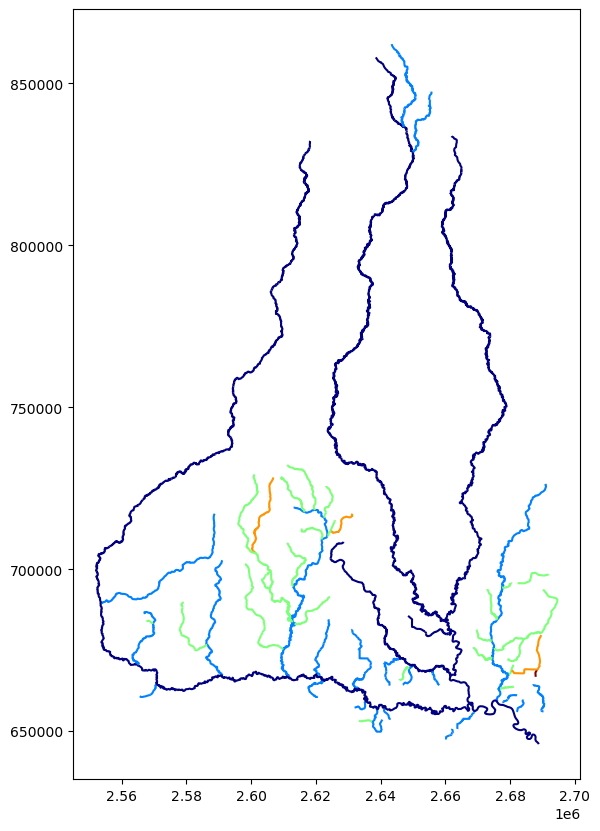

In [21]:
# reads stream order shapefile
streamOrder=gpd.read_file(inputStreamOrder)

# plots stream order shapefile
streamOrder.plot(figsize=(10,10),cmap='jet',column='StreamOrd')

In [22]:
# confirms crs match
assert structures.crs==streamOrder.crs

In [23]:
# applies join attribute by nearest function
structures=joinAttrsByNearest(structures,streamOrder[['StreamOrd','geometry']],50)

# renames associated field
structures=structures.rename(columns={'StreamOrd':'StreamOrd'})

CREATES FIELD FOR DETAIL OF SURVEY CRITERION

<AxesSubplot: >

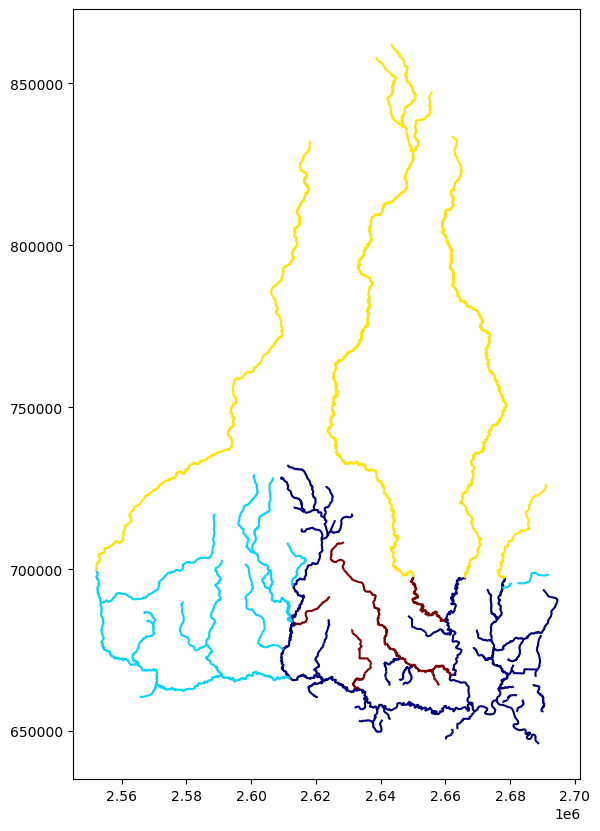

In [24]:
# reads survey detail shapefile
detailOfSurvey=gpd.read_file(inputDetailOfSurvey)

# plots survey detail shapefile
detailOfSurvey.plot(figsize=(10,10),cmap='jet',column='Level')

In [25]:
# confirms crs match
assert structures.crs==detailOfSurvey.crs

In [26]:
# applies join attribute by nearest function
structures=joinAttrsByNearest(structures,detailOfSurvey[['Level','geometry']],50)

# renames associated field
structures=structures.rename(columns={'Level':'DetailSur'})

In [27]:
# creates text filter function to simplify classifications
def detailOfSurveyTextFilter(string):
    string=str(string)
    if string.find('-')!=-1:
        string=string[:string.find('-')]
    return string

# applies text filter function to structures dataframe
structures['DetailSur']=structures['DetailSur'].map(lambda x:detailOfSurveyTextFilter(x))

CONVERTS CRITIERIA CLASSIFICATIONS TO NUMERICAL RANKS

In [28]:
# assigns numerical ranks to head differential values by inverting numbers
structures['_RankHD']=structures['25yrDiff'].max()-structures['25yrDiff']

In [29]:
# defines function to convert values to integers
def ranksToInteger(data):
    rank=int(data)
    return rank

In [30]:
# assigns numerical values to classifications
ranksRoadwayClassification={'motorway':1,'primary':2,'trunk':2,'secondary':3,'major':4,'urban collector':4,'minor':5}

# maps numerical values based on dictionary entries
structures['_RankRC']=structures.RoadClass.map(ranksRoadwayClassification)

# fills null values with determined null rank
structures.loc[structures._RankRC.isna(),'_RankRC']=6

# passes function to convert values to integers
structures['_RankRC']=structures['_RankRC'].map(lambda x:ranksToInteger(x))

In [31]:
# populates rank column with previously associated values
structures['_RankSO']=structures.StreamOrd

# determines null value by adding one to max associated value
streamOrderNullValue=max(structures._RankSO.dropna().unique())+1

# fills null values with determined null rank
structures.loc[structures._RankSO.isna(),'_RankSO']=streamOrderNullValue

# passes function to convert values to integers
structures['_RankSO']=structures['_RankSO'].map(lambda x:ranksToInteger(x))

In [32]:
# assigns numerical values to classifications
ranksDetailOfSurvey={'High Need':1,'Mid Need':2,'Low Need':3}

# maps numerical values based on dictionary entries
structures['_RankDS']=structures.DetailSur.map(ranksDetailOfSurvey)

# fills null values with determined null rank
structures.loc[structures._RankDS.isna(),'_RankDS']=4

# passes function to convert values to integers
structures['_RankDS']=structures['_RankDS'].map(lambda x:ranksToInteger(x))

NORMALIZES AND INVERTS RANKS TO 0 TO 1 SCALE

In [33]:
# defines function to normalize and invert 
# values
def normalizeRanks(raw_rank,min_value,max_value):
    normalized_rank=(raw_rank-min_value)/(max_value-min_value)
    inverted_rank=1-normalized_rank
    return inverted_rank

In [34]:
# normalizes and inverts the overtopping ranks by passing the function
structures['NormalOT']=structures['25yrOver'].map(lambda x:normalizeRanks(x,min(structures['25yrOver'].unique()),max(structures['25yrOver'].unique())))

# normalizes and inverts the head differential ranks by passing the function
structures['NormalHD']=structures['_RankHD'].map(lambda x:normalizeRanks(x,min(structures['25yrDiff'].unique()),max(structures['25yrDiff'].unique())))

# normalizes and inverts the roadway classification ranks by passing the function
structures['NormalRC']=structures['_RankRC'].map(lambda x:normalizeRanks(x,min(structures._RankRC.unique()),max(structures._RankRC.unique())))

# normalizes and inverts the stream order ranks by passing the function
structures['NormalSO']=structures['_RankSO'].map(lambda x:normalizeRanks(x,min(structures._RankSO.unique()),max(structures._RankSO.unique())))

# normalizes and inverts the detail of survey ranks by passing the function
structures['NormalDS']=structures['_RankDS'].map(lambda x:normalizeRanks(x,min(structures._RankDS.unique()),max(structures._RankDS.unique())))

CALCULATES UNWEIGHTED FINAL RANK FOR EACH STRUCTURE

In [35]:
# sums values from all normalized rank columns
structures['FinalRank']=structures['NormalOT']+structures['NormalHD']+structures['NormalRC']+structures['NormalSO']+structures['NormalDS']

CLEANS AND FORMATS SHAPEFILE DATA

In [36]:
# drops unnecessary fields from geodataframe
structures=structures.drop(columns={'Top_Elev','US_WSE','DS_WSE','_RankHD','_RankRC','_RankSO','_RankDS'})

# converts nan string to null values for output shapefile
structures['RoadClass']=structures['RoadClass'].replace('nan','')

# converts nan string to null values for output shapefile
structures['DetailSur']=structures['DetailSur'].replace('nan','')

# converts stream order field to be formatted as integers and ignores null values
structures['StreamOrd']=structures['StreamOrd'].astype(int,errors='ignore')

# rounds all fields that are float types to 2 decimal places
structures=structures.round(2)

# creates blank notes field for engineering judgement
structures['Notes']=''

# creates field datatype dictionary for final shapefile
convertDict={'Model':str,
             'Type':str,
             'Name':str,
             '25yrOver':str,
             '25yrDiff':str,
             'RoadClass':str,
             'StreamOrd':str,
             'DetailSur':str,
             'NormalOT':str,
             'NormalHD':str,
             'NormalRC':str,
             'NormalSO':str,
             'NormalDS':str,
             'FinalRank':str,
             'Notes':str}

# converts entire dataframe to string type to hold formatting
structures=structures.astype(convertDict)

# converts nan string to null values for output shapefile
structures['StreamOrd']=structures['StreamOrd'].replace('nan','')

# creates fid identifier field
structures['fid']=range(len(structures))
structures['fid']=structures['fid']+1

# reorders fields for output
structures=structures[['fid','Model','Type','Name','25yrOver','25yrDiff','RoadClass','StreamOrd','DetailSur',
                       'NormalOT','NormalHD','NormalRC','NormalSO','NormalDS','FinalRank','Notes','geometry']]

CHANGES WORKING DIRECTORY FOR OUTPUT

In [37]:
# sets working directory
pth=Path(r'C:\Users\christianl\repos\lwi-apps\data\interim')
os.chdir(pth)

OUTPUTS ALL STRUCTURE DATA TO SHAPEFILE

In [38]:
# creates shapefile output file from structures dataframe
structures.to_file('WF_CPPJStructures_Ranked.shp')

In [39]:
structures.to_excel('WF_CPPJStructures_Ranked.xlsx')

PREPARES STRUCTURE DATA FOR VISUALIZATION TOOL

In [40]:
# # removes intermediate steps from calculations
# structures=structures.drop(columns=['25yrOver','25yrDiff','RoadClass','StreamOrd','DetailSur','FinalRank'])

# # reorders fields for output
# structures=structures[['fid','Model','Type','Name','NormalOT','NormalHD','NormalRC','NormalSO','NormalDS','geometry']]

# # renames fields to be more readable in visualization tool
# structures=structures.rename(columns={'NormalOT':'25yr_Overtopping','NormalHD':'25yr_Head_Differential','NormalRC':'Roadway_Classification',
# 'NormalSO':'Stream_Order','NormalDS':'Detail_of_Survey'})

OUTPUTS ALL STRUCTURE DATA TO JSON FOR VISUALIZATION TOOL

In [41]:
# # creates json output file from structures dataframe
# structures.to_crs('EPSG:4326').to_file('WF_CPPJStructures_VisualizationInput.json',driver='GeoJSON')